In [207]:
import sqlalchemy as db
import mysql.connector
import pandas as pd
import pymysql
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics
import statistics as st
from scipy import stats

In [98]:
con = mysql.connector.connect(
    host='localhost',
    user='root',
    passwd='Karepenyong1?'
)

In [99]:
c = con.cursor()
q = 'USE world'
c.execute(q)

In [100]:
c = con.cursor()
q = 'SELECT * FROM city'
c.execute(q)
res = c.fetchall()
city = pd.DataFrame(res, columns=c.column_names)

In [101]:
c = con.cursor()
q = 'SELECT * FROM country'
c.execute(q)
res = c.fetchall()
country = pd.DataFrame(res, columns=c.column_names)

In [102]:
c = con.cursor()
q = 'SELECT * FROM countrylanguage'
c.execute(q)
res = c.fetchall()
countrylanguage = pd.DataFrame(res, columns=c.column_names)

# 1. 

In [103]:
country.dropna().sort_values('Population').head(10)[['Name','Continent','Region','IndepYear','Population']]

,Name,Continent,Region,IndepYear,Population
123,Liechtenstein,Europe,Western Europe,1806.0,32300
13,Antigua and Barbuda,North America,Caribbean,1981.0,68000
58,Dominica,North America,Caribbean,1978.0,71000
202,Seychelles,Africa,Eastern Africa,1976.0,77000
212,Tonga,Oceania,Polynesia,1970.0,99000
233,Samoa,Oceania,Polynesia,1962.0,180000
231,Vanuatu,Oceania,Melanesia,1980.0,190000
27,Belize,North America,Central America,1981.0,241000
31,Barbados,North America,Caribbean,1966.0,270000
104,Iceland,Europe,Nordic Countries,1944.0,279000


In [281]:
city.groupby('CountryCode').describe()['Population'][['mean']].sort_values('mean',ascending=False).head(10)

,mean
CountryCode,
SGP,4017733.0
HKG,1650316.5
URY,1236000.0
GIN,1090610.0
UGA,890800.0
SLE,850000.0
LBR,850000.0
MLI,809552.0
AUS,808119.0


In [292]:
countrylanguage.groupby('Language').describe()['Percentage'][['count']].sort_values('count',ascending=False).head(10)

,count
Language,
English,60.0
Arabic,33.0
Spanish,28.0
French,25.0
Chinese,19.0
German,19.0
Russian,17.0
Italian,15.0
Creole English,14.0


# 2. 

In [148]:
country

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,JosÃ© Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,ShqipÃ«ria,Republic,Rexhep Mejdani,34.0,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,YEM,Yemen,Asia,Middle East,527968.0,1918.0,18112000,59.8,6041.0,5729.0,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE
235,YUG,Yugoslavia,Europe,Southern Europe,102173.0,1918.0,10640000,72.4,17000.0,NaN,Jugoslavija,Federal Republic,Vojislav KoÂštunica,1792.0,YU
236,ZAF,South Africa,Africa,Southern Africa,1221037.0,1910.0,40377000,51.1,116729.0,129092.0,South Africa,Republic,Thabo Mbeki,716.0,ZA
237,ZMB,Zambia,Africa,Eastern Africa,752618.0,1964.0,9169000,37.2,3377.0,3922.0,Zambia,Republic,Frederick Chiluba,3162.0,ZM


In [149]:
continent = country.groupby('Continent').sum()[['Population']]
continent

,Population
Continent,
Africa,784475000
Antarctica,0
Asia,3705025700
Europe,730074600
North America,482993000
Oceania,30401150
South America,345780000


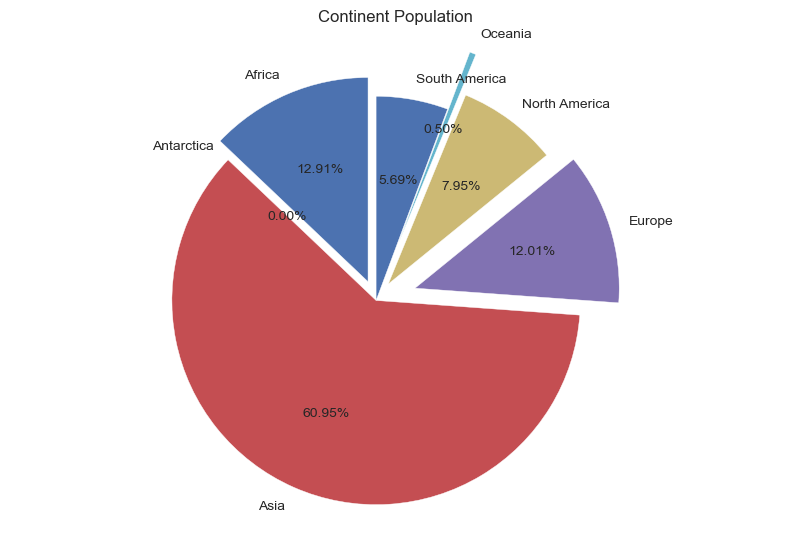

In [107]:
data = list(continent['Population'])
labels = list(continent['Population'].index)
explode = [0.1, 0, 0, 0.2, 0.1, 0.3, 0]

plt.pie(data, labels=labels, explode=explode,
        startangle=90, autopct=lambda p:f'{p:.2f}%',
        wedgeprops={'edgecolor': 'white'})

plt.title("Continent Population")
plt.tight_layout()
plt.axis('equal')
plt.show()


In [108]:
## JAWABAN ##
## Dilihat dari presentase tiap benua, benua Asia adalah penyumbang populasi terbanyak yaitu sebesar 60.95%
## Presentase populasi manusia yang berada di benua Amerika Utara sebesar 7.95%

# 3.

In [119]:
country

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,JosÃ© Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,ShqipÃ«ria,Republic,Rexhep Mejdani,34.0,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,YEM,Yemen,Asia,Middle East,527968.0,1918.0,18112000,59.8,6041.0,5729.0,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE
235,YUG,Yugoslavia,Europe,Southern Europe,102173.0,1918.0,10640000,72.4,17000.0,NaN,Jugoslavija,Federal Republic,Vojislav KoÂštunica,1792.0,YU
236,ZAF,South Africa,Africa,Southern Africa,1221037.0,1910.0,40377000,51.1,116729.0,129092.0,South Africa,Republic,Thabo Mbeki,716.0,ZA
237,ZMB,Zambia,Africa,Eastern Africa,752618.0,1964.0,9169000,37.2,3377.0,3922.0,Zambia,Republic,Frederick Chiluba,3162.0,ZM


In [147]:
country[country['Continent']=='Asia'].sort_values('Population',ascending=False)[['Name','Population']].head(10)

,Name,Population
41,China,1277558000
99,India,1013662000
98,Indonesia,212107000
164,Pakistan,156483000
21,Bangladesh,129155000
109,Japan,126714000
230,Vietnam,79832000
168,Philippines,75967000
102,Iran,67702000
215,Turkey,66591000


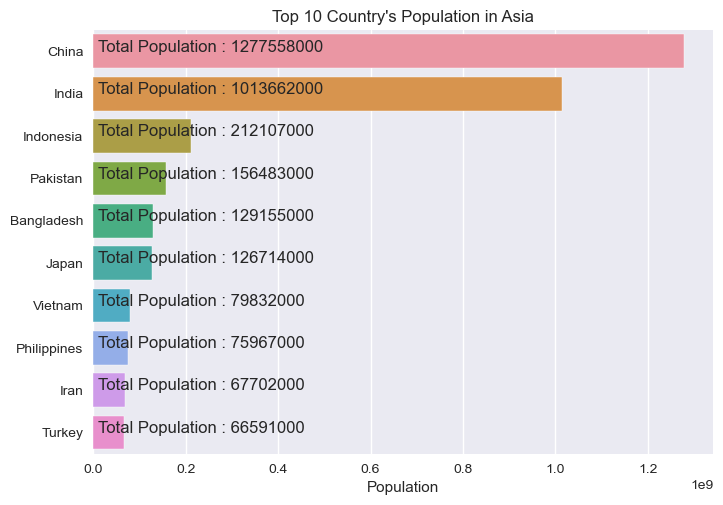

In [303]:
# plt.rcdefaults()
sns.set(style="whitegrid")
plt.style.use('seaborn')
fig, ax = plt.subplots()

# Example data
y = list(country[country['Continent']=='Asia'].sort_values('Population',ascending=False)['Name'].head(10))
y_pos = np.arange(len(y))
x = list(country[country['Continent']=='Asia'].sort_values('Population',ascending=False)['Population'].head(10))

ax = sns.barplot(x=x, y=y)
ax.set_yticklabels(y)
ax.set_xlabel('Population')
ax.set_title("Top 10 Country's Population in Asia")

for a in y_pos :
    plt.text(10000000,a,f'Total Population : {x[a]}')

plt.show()

In [ ]:
## JAWABAN ##
## Negara dengan populasi terbanyak yaitu China dengan Total Populasi sebesar 1277558000
## Negara yang menjadi urutan ke-10 adalah Turkey dengan Total Populasi sebesar 66591000
## Total Populasi negara yang berada di urutan ketiga sebesar 212107000 yaitu Indonesia

# 4.

In [180]:
country

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,JosÃ© Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,ShqipÃ«ria,Republic,Rexhep Mejdani,34.0,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,YEM,Yemen,Asia,Middle East,527968.0,1918.0,18112000,59.8,6041.0,5729.0,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE
235,YUG,Yugoslavia,Europe,Southern Europe,102173.0,1918.0,10640000,72.4,17000.0,NaN,Jugoslavija,Federal Republic,Vojislav KoÂštunica,1792.0,YU
236,ZAF,South Africa,Africa,Southern Africa,1221037.0,1910.0,40377000,51.1,116729.0,129092.0,South Africa,Republic,Thabo Mbeki,716.0,ZA
237,ZMB,Zambia,Africa,Eastern Africa,752618.0,1964.0,9169000,37.2,3377.0,3922.0,Zambia,Republic,Frederick Chiluba,3162.0,ZM


In [212]:
LifeExpectancy = country[country['Continent']=='Asia']['LifeExpectancy']
LifeExpectancy

1      45.9
7      74.1
9      66.4
16     62.9
21     60.2
23     73.0
32     73.6
33     52.4
41     71.4
54     76.7
77     64.5
92     79.5
98     68.0
99     62.5
102    69.7
103    66.5
105    78.6
108    77.4
109    80.7
110    63.2
112    63.4
113    56.5
116    74.4
117    76.1
118    53.1
119    71.3
124    71.8
129    81.6
134    62.2
140    54.9
141    67.3
149    70.8
160    57.8
163    71.8
164    61.1
168    67.5
173    70.7
176    71.4
178    72.4
183    67.8
186    80.1
203    68.5
207    68.6
208    64.1
210    60.9
211    46.0
215    71.0
217    76.4
224    63.7
230    69.3
234    59.8
Name: LifeExpectancy, dtype: float64

In [213]:
LifeExpectancy.describe()

count    51.000000
mean     67.441176
std       8.396527
min      45.900000
25%      62.700000
50%      68.500000
75%      72.700000
max      81.600000
Name: LifeExpectancy, dtype: float64

## IQR

In [214]:
q3 = np.quantile(LifeExpectancy, .75)
q1 = np.quantile(LifeExpectancy, .25)
iqr = q3 - q1
print(f'IQR Benua Asia = {iqr}')

IQR Benua Asia = 10.0


## Mean

In [215]:
mean = np.mean(LifeExpectancy)
mean

67.44117647058825

## Median

In [216]:
median = np.median(LifeExpectancy)
median

68.5

## Standar Deviasi

In [217]:
std = statistics.stdev(LifeExpectancy)
std

8.39652729336571

## Upper Boundaries

In [218]:
upper = q3 + 1.5*iqr
upper

87.7

## Lower Boundaries

In [219]:
lower = q1 - 1.5*iqr
lower

47.7

## Skewness Test

In [224]:
skew_score, p_value = stats.skewtest(LifeExpectancy)
skew_score

-1.810788593529504

## Distribution Plot

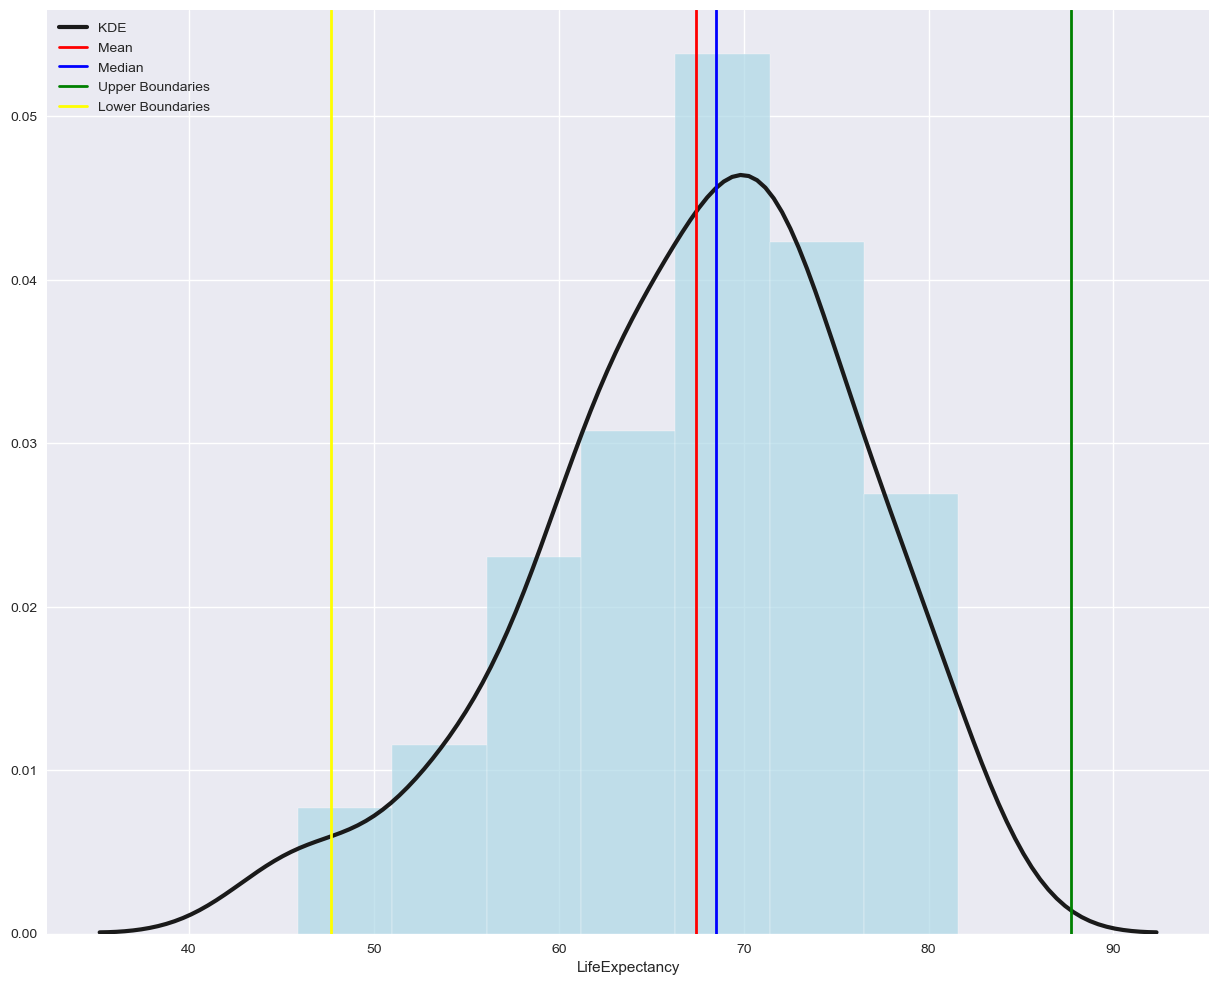

In [196]:
plt.figure(figsize=(15,12))
ax = sns.distplot(LifeExpectancy, kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"alpha": 0.7, "color": "lightblue"})

plt.axvline(mean, color='red', label='Mean', linewidth=2)
plt.axvline(median, color='blue', label='Median', linewidth=2)
plt.axvline(upper, color='green', label='Upper Boundaries', linewidth=2)
plt.axvline(lower, color='yellow', label='Lower Boundaries', linewidth=2)
plt.legend()

plt.show()


## Outliers

In [201]:
Asia = country[country['Continent']=='Asia']
Asia[(Asia['LifeExpectancy']>upper) | (Asia['LifeExpectancy']<lower)]

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
211,TMP,East Timor,Asia,Southeast Asia,14874.0,NaN,885000,46.0,0.0,NaN,Timor Timur,Administrated by the UN,JosÃ© Alexandre GusmÃ£o,1522.0,TP


## Skewness Test

In [227]:
## Berdasarkan Skewness Test data LifeExpectancy Benua Asia termasuk data skew karena memiliki nilai skew test > 1 atau < -1
skew_score

-1.810788593529504

# 5.

In [293]:
country

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,GNPperCapita
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,8.280000e+08,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW,8038.834951
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5.976000e+09,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF,263.028169
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6.648000e+09,7984.0,Angola,Republic,JosÃ© Eduardo dos Santos,56.0,AO,516.229228
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,6.320000e+07,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI,7900.000000
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3.205000e+09,2500.0,ShqipÃ«ria,Republic,Rexhep Mejdani,34.0,AL,942.314477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,YEM,Yemen,Asia,Middle East,527968.0,1918.0,18112000,59.8,6.041000e+09,5729.0,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE,333.535777
235,YUG,Yugoslavia,Europe,Southern Europe,102173.0,1918.0,10640000,72.4,1.700000e+10,NaN,Jugoslavija,Federal Republic,Vojislav KoÂštunica,1792.0,YU,1597.744361
236,ZAF,South Africa,Africa,Southern Africa,1221037.0,1910.0,40377000,51.1,1.167290e+11,129092.0,South Africa,Republic,Thabo Mbeki,716.0,ZA,2890.977537
237,ZMB,Zambia,Africa,Eastern Africa,752618.0,1964.0,9169000,37.2,3.377000e+09,3922.0,Zambia,Republic,Frederick Chiluba,3162.0,ZM,368.306249


## GNP dikali 1.000.000

In [229]:
# country['GNP'] = country['GNP'] * 1000000

In [304]:
country

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,GNPperCapita
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,8.280000e+08,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW,8038.834951
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5.976000e+09,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF,263.028169
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6.648000e+09,7984.0,Angola,Republic,JosÃ© Eduardo dos Santos,56.0,AO,516.229228
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,6.320000e+07,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI,7900.000000
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3.205000e+09,2500.0,ShqipÃ«ria,Republic,Rexhep Mejdani,34.0,AL,942.314477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,YEM,Yemen,Asia,Middle East,527968.0,1918.0,18112000,59.8,6.041000e+09,5729.0,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE,333.535777
235,YUG,Yugoslavia,Europe,Southern Europe,102173.0,1918.0,10640000,72.4,1.700000e+10,NaN,Jugoslavija,Federal Republic,Vojislav KoÂštunica,1792.0,YU,1597.744361
236,ZAF,South Africa,Africa,Southern Africa,1221037.0,1910.0,40377000,51.1,1.167290e+11,129092.0,South Africa,Republic,Thabo Mbeki,716.0,ZA,2890.977537
237,ZMB,Zambia,Africa,Eastern Africa,752618.0,1964.0,9169000,37.2,3.377000e+09,3922.0,Zambia,Republic,Frederick Chiluba,3162.0,ZM,368.306249


## GNPperCapita Dataframe

In [239]:
def gnppercapita(x,y) :
    data = []
    for a in range(len(x)) :
        data.append(x[a]/y[a])

    return data


In [242]:
country['GNPperCapita'] = gnppercapita(country['GNP'],country['Population'])

In [243]:
country

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,GNPperCapita
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,8.280000e+08,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW,8038.834951
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5.976000e+09,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF,263.028169
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6.648000e+09,7984.0,Angola,Republic,JosÃ© Eduardo dos Santos,56.0,AO,516.229228
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,6.320000e+07,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI,7900.000000
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3.205000e+09,2500.0,ShqipÃ«ria,Republic,Rexhep Mejdani,34.0,AL,942.314477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,YEM,Yemen,Asia,Middle East,527968.0,1918.0,18112000,59.8,6.041000e+09,5729.0,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE,333.535777
235,YUG,Yugoslavia,Europe,Southern Europe,102173.0,1918.0,10640000,72.4,1.700000e+10,NaN,Jugoslavija,Federal Republic,Vojislav KoÂštunica,1792.0,YU,1597.744361
236,ZAF,South Africa,Africa,Southern Africa,1221037.0,1910.0,40377000,51.1,1.167290e+11,129092.0,South Africa,Republic,Thabo Mbeki,716.0,ZA,2890.977537
237,ZMB,Zambia,Africa,Eastern Africa,752618.0,1964.0,9169000,37.2,3.377000e+09,3922.0,Zambia,Republic,Frederick Chiluba,3162.0,ZM,368.306249


# 6.

In [258]:
country

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,GNPperCapita
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,8.280000e+08,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW,8038.834951
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5.976000e+09,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF,263.028169
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6.648000e+09,7984.0,Angola,Republic,JosÃ© Eduardo dos Santos,56.0,AO,516.229228
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,6.320000e+07,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI,7900.000000
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3.205000e+09,2500.0,ShqipÃ«ria,Republic,Rexhep Mejdani,34.0,AL,942.314477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,YEM,Yemen,Asia,Middle East,527968.0,1918.0,18112000,59.8,6.041000e+09,5729.0,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE,333.535777
235,YUG,Yugoslavia,Europe,Southern Europe,102173.0,1918.0,10640000,72.4,1.700000e+10,NaN,Jugoslavija,Federal Republic,Vojislav KoÂštunica,1792.0,YU,1597.744361
236,ZAF,South Africa,Africa,Southern Africa,1221037.0,1910.0,40377000,51.1,1.167290e+11,129092.0,South Africa,Republic,Thabo Mbeki,716.0,ZA,2890.977537
237,ZMB,Zambia,Africa,Eastern Africa,752618.0,1964.0,9169000,37.2,3.377000e+09,3922.0,Zambia,Republic,Frederick Chiluba,3162.0,ZM,368.306249


## Korelasi LifeExpectancy dengan GNPperCapita

In [273]:
country['LifeExpectancy'].corr(country['GNPperCapita'],method='spearman')

0.7451212078375073

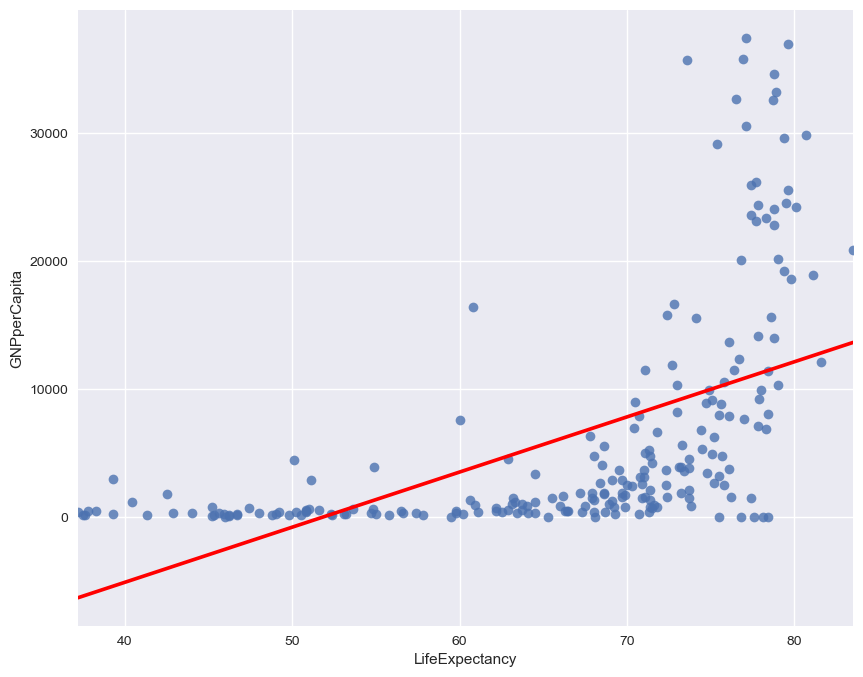

In [249]:
plt.figure(figsize=(10,8))
ax = sns.regplot(x="LifeExpectancy", y="GNPperCapita", data=country, ci=None,
                 line_kws={'color':'red'})

In [300]:
## Jika suatu negara memiliki LifeExpectancy yang tinggi tidak selalu memilki GNPperCapita yang tinggi pula
## Terbukti pada plot diatas bahwa terdapat suatu negara yang memliki LifeExpectancy > 70 namun memilki GNPperCapita yang masih disekitaran 0 
## Namun suatu negara memungkinkan memilki GNPperCapita yang tinggi jika LifeExpectancy juga tinggi karena memliki korelasi positif dengan nilai korelasi Spearman (data tidak normal) sebesar 0.7451212078375073 (dapat dikatakan signifikan) yang ditunjukan pula oleh garis merah pada plot

##  Benua dengan salah satu negaranya mencetak GNPperCapita tertinggi

In [259]:
country

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,GNPperCapita
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,8.280000e+08,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW,8038.834951
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5.976000e+09,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF,263.028169
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6.648000e+09,7984.0,Angola,Republic,JosÃ© Eduardo dos Santos,56.0,AO,516.229228
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,6.320000e+07,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI,7900.000000
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3.205000e+09,2500.0,ShqipÃ«ria,Republic,Rexhep Mejdani,34.0,AL,942.314477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,YEM,Yemen,Asia,Middle East,527968.0,1918.0,18112000,59.8,6.041000e+09,5729.0,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE,333.535777
235,YUG,Yugoslavia,Europe,Southern Europe,102173.0,1918.0,10640000,72.4,1.700000e+10,NaN,Jugoslavija,Federal Republic,Vojislav KoÂštunica,1792.0,YU,1597.744361
236,ZAF,South Africa,Africa,Southern Africa,1221037.0,1910.0,40377000,51.1,1.167290e+11,129092.0,South Africa,Republic,Thabo Mbeki,716.0,ZA,2890.977537
237,ZMB,Zambia,Africa,Eastern Africa,752618.0,1964.0,9169000,37.2,3.377000e+09,3922.0,Zambia,Republic,Frederick Chiluba,3162.0,ZM,368.306249


In [299]:
continent_max = country[country['GNPperCapita'] == country['GNPperCapita'].max()]['Continent']
list(continent_max)[0]

'Europe'

In [272]:
country[country['Continent']==list(continent_max)[0]].sort_values('GNPperCapita',ascending=False)

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,GNPperCapita
127,LUX,Luxembourg,Europe,Western Europe,2586.0,1867.0,435700,77.1,1.632100e+10,15519.0,Luxembourg/LÃ«tzebuerg,Constitutional Monarchy,Henri,2452.0,LU,37459.260959
39,CHE,Switzerland,Europe,Western Europe,41284.0,1499.0,7160400,79.6,2.644780e+11,256092.0,Schweiz/Suisse/Svizzera/Svizra,Federation,Adolf Ogi,3248.0,CH,36936.204681
123,LIE,Liechtenstein,Europe,Western Europe,160.0,1806.0,32300,78.8,1.119000e+09,1084.0,Liechtenstein,Constitutional Monarchy,Hans-Adam II,2446.0,LI,34643.962848
59,DNK,Denmark,Europe,Nordic Countries,43094.0,800.0,5330000,76.5,1.740990e+11,169264.0,Danmark,Constitutional Monarchy,Margrethe II,3315.0,DK,32663.977486
159,NOR,Norway,Europe,Nordic Countries,323877.0,1905.0,4478500,78.7,1.458950e+11,153370.0,Norge,Constitutional Monarchy,Harald V,2807.0,NO,32576.755610
104,ISL,Iceland,Europe,Nordic Countries,103000.0,1944.0,279000,79.4,8.255000e+09,7474.0,Ãsland,Republic,Ã“lafur Ragnar GrÃ­msson,1449.0,IS,29587.813620
15,AUT,Austria,Europe,Western Europe,83859.0,1918.0,8091800,77.7,2.118600e+11,206025.0,Ã–sterreich,Federal Republic,Thomas Klestil,1523.0,AT,26182.060852
56,DEU,Germany,Europe,Western Europe,357022.0,1955.0,82164700,77.4,2.133367e+12,2102826.0,Deutschland,Federal Republic,Johannes Rau,3068.0,DE,25964.520043
200,SWE,Sweden,Europe,Nordic Countries,449964.0,836.0,8861400,79.6,2.264920e+11,227757.0,Sverige,Constitutional Monarchy,Carl XVI Gustaf,3048.0,SE,25559.392421
18,BEL,Belgium,Europe,Western Europe,30518.0,1830.0,10239000,77.8,2.497040e+11,243948.0,BelgiÃ«/Belgique,"Constitutional Monarchy, Federation",Albert II,179.0,BE,24387.537845
